<a href="https://www.bharathkreddy.com"><img align="left" src="https://i.imgur.com/axjt3Qe.png" alt="WWW.BHARARTHKREDDY.COM" title="www.bharathkreddy.com"></a>
# [www.bharathkreddy.com](https://www.bharathkreddy.com)

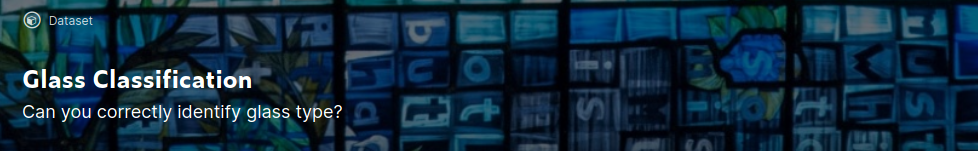

## Context

This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)
Content

## Attribute Information:

    Id number**: 1 to 214 (removed from CSV file)
    RI: refractive index
    Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
    Mg: Magnesium
    Al: Aluminum
    Si: Silicon
    K: Potassium
    Ca: Calcium
    Ba: Barium
    Fe: Iron
    Type of glass: (class attribute)
    -- 1 buildingwindowsfloatprocessed -- 2 buildingwindowsnonfloatprocessed -- 3 vehiclewindowsfloatprocessed
    -- 4 vehiclewindowsnonfloatprocessed (none in this database)
    -- 5 containers
    -- 6 tableware
    -- 7 headlamps

If you are more interested about data and its attributes, you can find details [here](https://github.com/bharathkreddy/ML-Bootcamp/blob/master/data/glass.names), you can find the dataset [here](https://github.com/bharathkreddy/ML-Bootcamp/blob/master/data/glass.data)

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/bharathkreddy/ML-Bootcamp/master/data/glass.csv",
                names= ['ri','na','mg','al','si','k','ca','ba','fe','type'])

In [5]:
df

,ri,na,mg,al,si,k,ca,ba,fe,type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# Step 1 : EDA 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ri      214 non-null    float64
 1   na      214 non-null    float64
 2   mg      214 non-null    float64
 3   al      214 non-null    float64
 4   si      214 non-null    float64
 5   k       214 non-null    float64
 6   ca      214 non-null    float64
 7   ba      214 non-null    float64
 8   fe      214 non-null    float64
 9   type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
df.describe()

,ri,na,mg,al,si,k,ca,ba,fe,type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [14]:
df.type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: type, dtype: int64

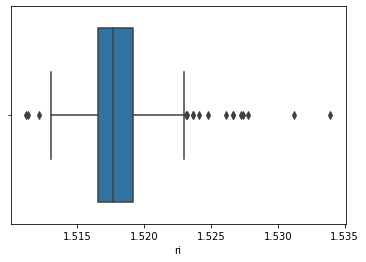

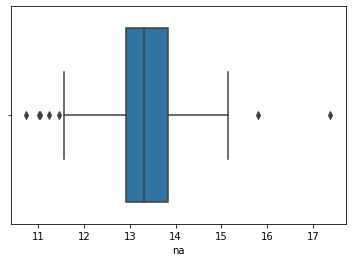

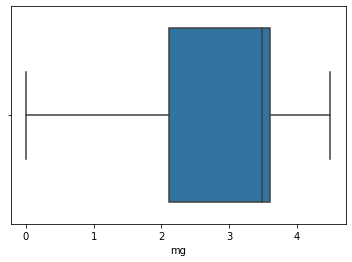

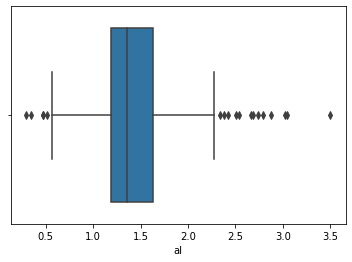

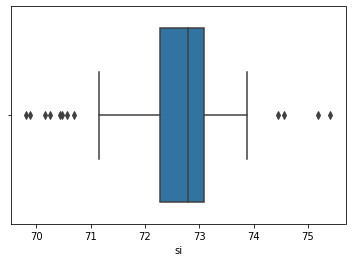

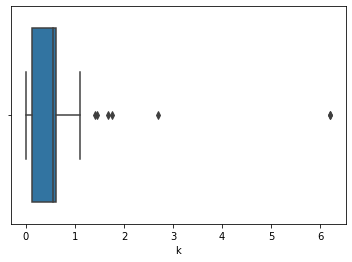

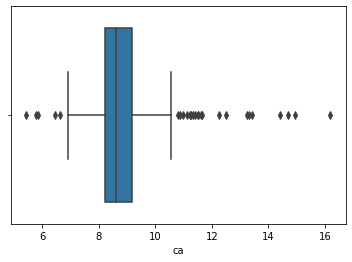

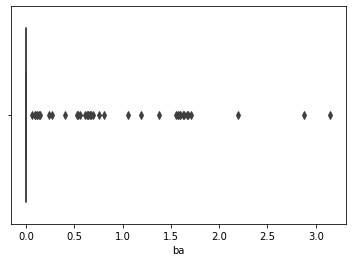

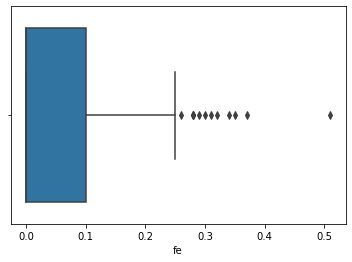

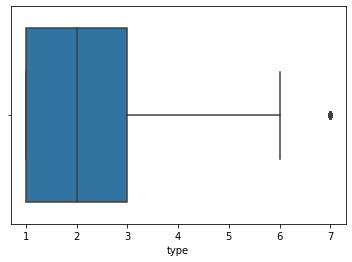

In [34]:
for col in df.columns:
    plt.figure()
    sns.boxplot(df[col])

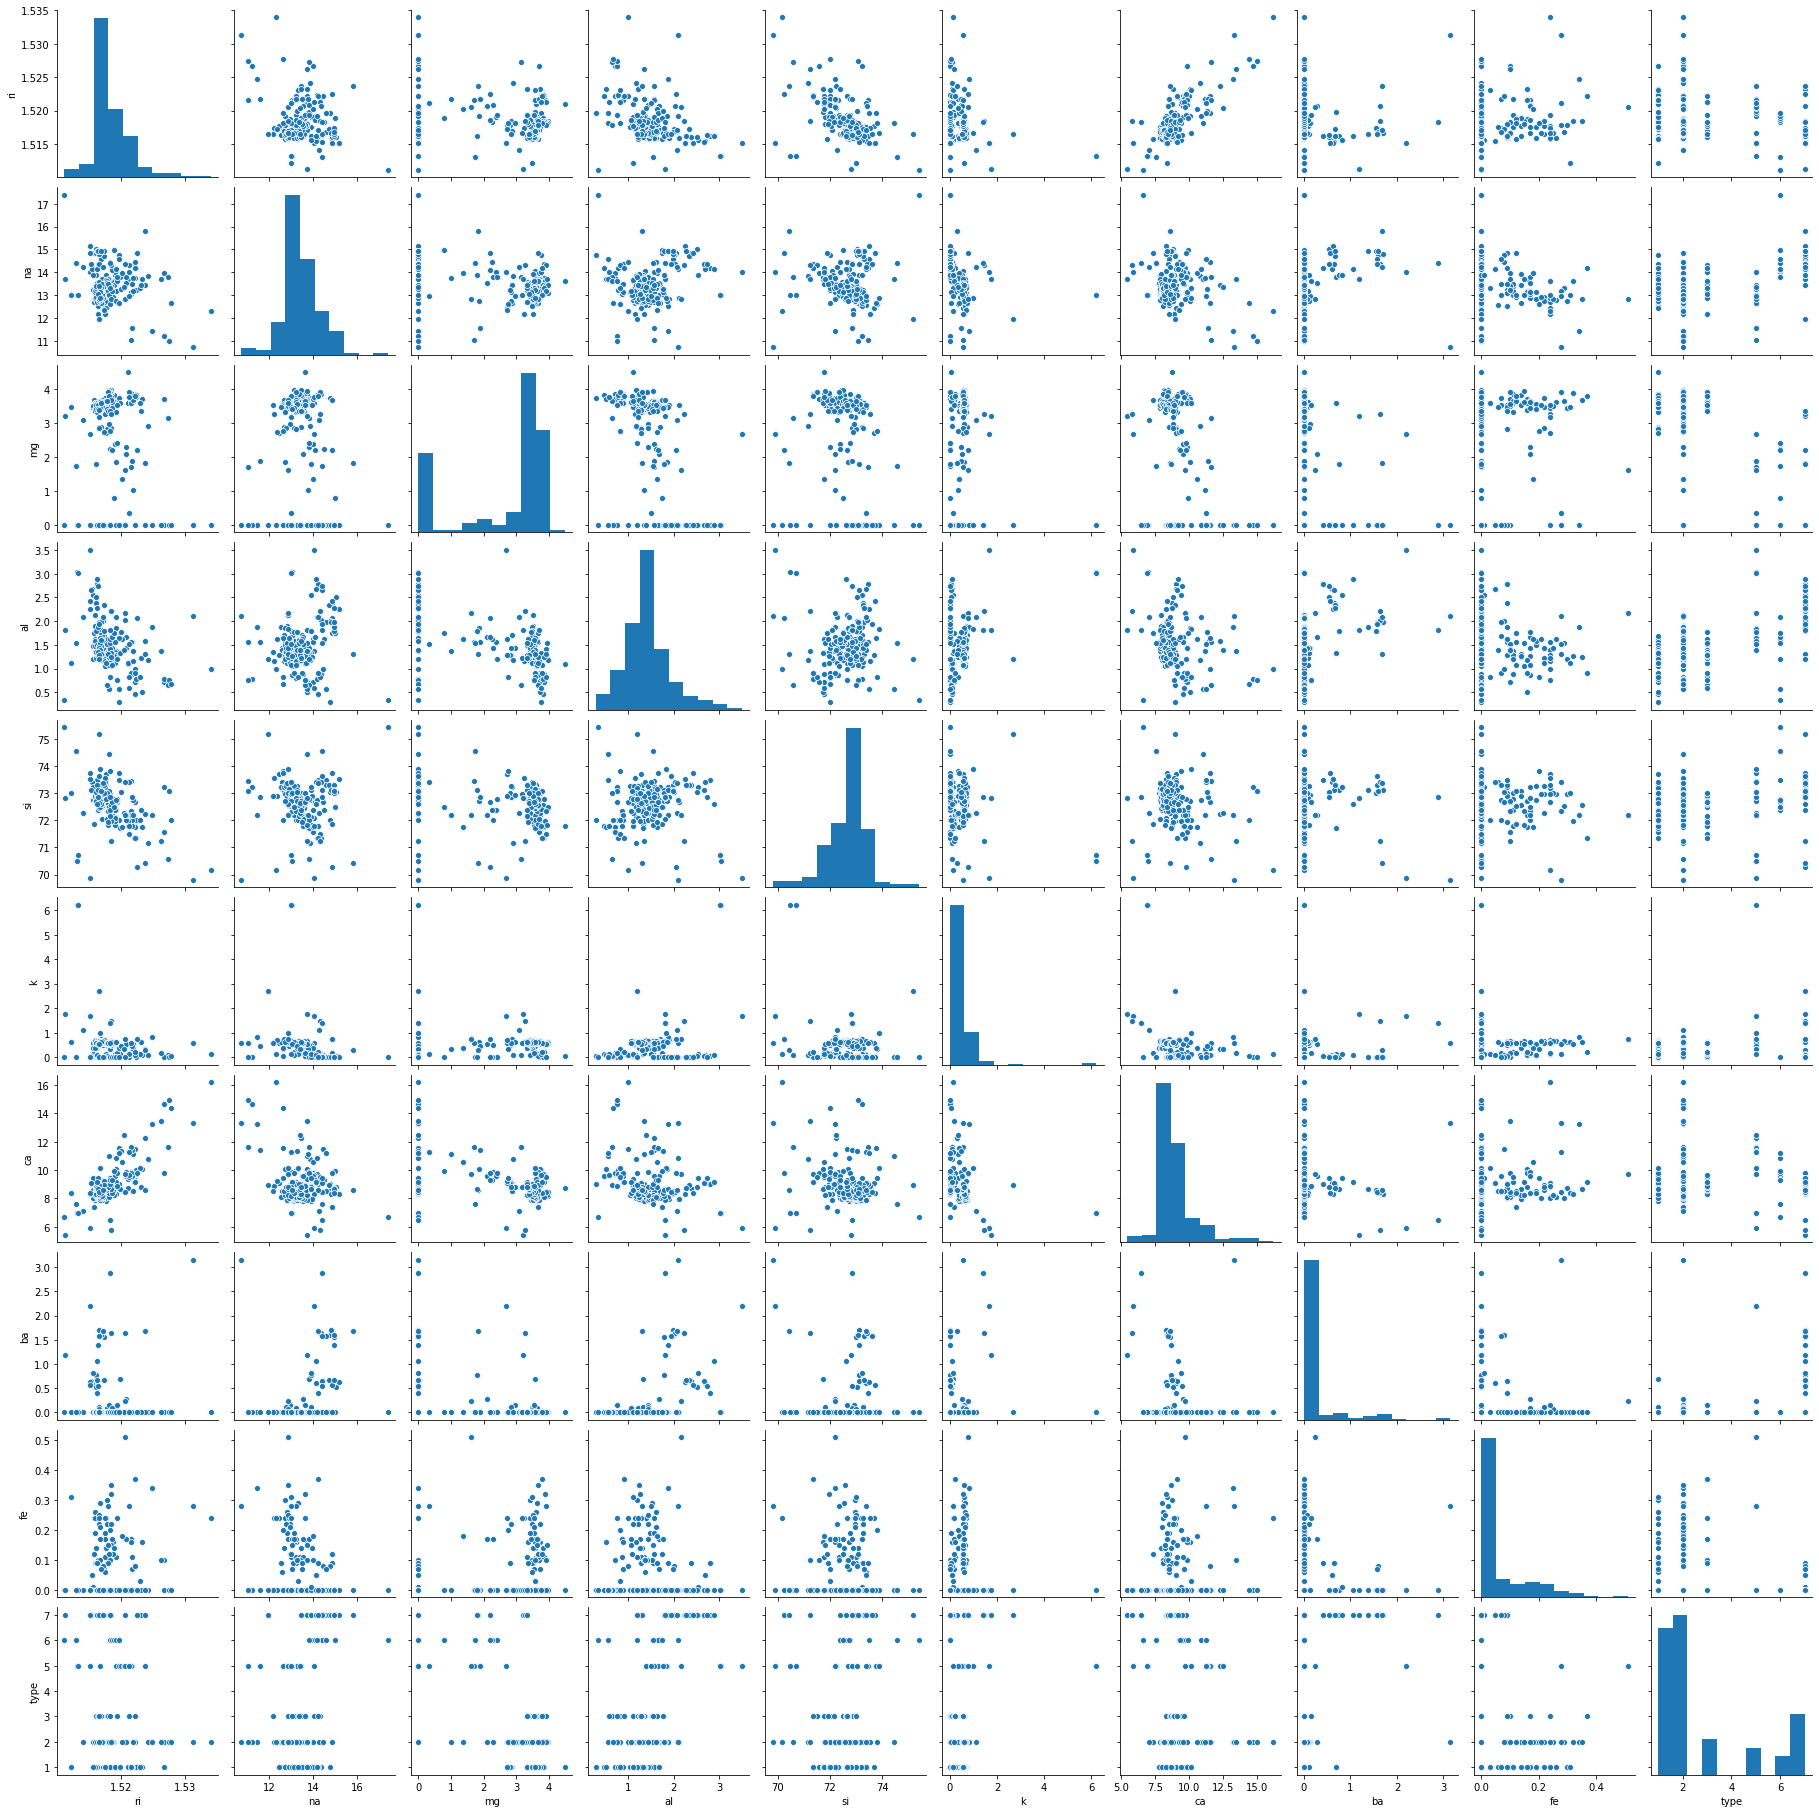

In [35]:
sns.pairplot(df)

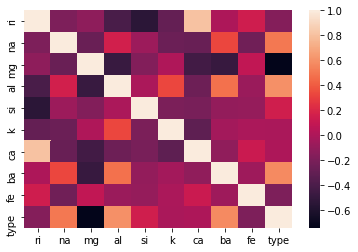

In [37]:
sns.heatmap(df.corr())

# observations from EDA
1. All values are numerical and contineous
2. There are no missing values in the data
3. Data has a lot of outliers, especially column ba and fe.
4. A lot of features are collinear i.e. have high corelation amongst each other.

### Treatment :
1. To treat collinearity and outliers we might go for a transformation like box-cox type of transformation which would mould that data to a more normal distributed shape and would also bring down corelations. However this is not inscope for the topic of Naive Bayes - readers are encouraged to read more and try the below algorithm with and without transformations and compare the results.

# Step 2 preprocessing the data and model implimentation.

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

NOTE1: We need not use any steps in preprocessing beyond scaling of the data. But in most of the situations where Naive Bayes algorithm is used - you would have to use label encoder.

NOTE 2: Because Naive Bayes algorithm works on probabilities only - it does not have any notion of distance and hence for multiple classes you can use label encoder instead of one hot encoder.

In [40]:
X = df.drop(['type'],axis=1)
y = df['type']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [41]:
my_pipeline = Pipeline([
    ('scaling',StandardScaler()),
    ('model',GaussianNB())
])

In [42]:
my_pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaling', StandardScaler()), ('model', GaussianNB())])

In [44]:
# lets check accuracy scors in training data
y_train_pred = my_pipeline.predict(X_train)

In [45]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           1       0.50      0.88      0.64        59
           2       0.63      0.19      0.30        62
           3       0.38      0.36      0.37        14
           5       0.33      0.22      0.27         9
           6       0.67      1.00      0.80         6
           7       0.90      0.90      0.90        21

    accuracy                           0.56       171
   macro avg       0.57      0.59      0.55       171
weighted avg       0.59      0.56      0.51       171



In [46]:
# Lets now check on test data and see how algorithm performs
y_test_pred = my_pipeline.predict(X_test)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           1       0.41      0.64      0.50        11
           2       0.43      0.21      0.29        14
           3       0.40      0.67      0.50         3
           5       0.50      0.25      0.33         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.56        43
   macro avg       0.60      0.63      0.59        43
weighted avg       0.55      0.56      0.53        43



## The overall model accuracy is 56%
## Lets try running naive bayes without scaling 
### Remember i said NB doesnt work on notion of distances and hence we can use label encoding instead of onehot encoding, by same logic we should also not need any scaling. 
### Lets check and see 

In [47]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.41      0.64      0.50        11
           2       0.43      0.21      0.29        14
           3       0.40      0.67      0.50         3
           5       0.50      0.25      0.33         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.56        43
   macro avg       0.60      0.63      0.59        43
weighted avg       0.55      0.56      0.53        43



# You see scaling doesnt make any difference to our model

# I would encourage you to apply Logistic regression and KNN and see how these models perform comparitively

# END OF NOTEBOOK